# Decision Tree Classification

---



We are going to cover the following topics:


*   Decision Tree Algorithm
*   How does the Decision Tree algorithm work?
*   Attribute Selection Measures
    *    Gini Index
    *    Entropy
    *    Information Gain
*    Optimizing Decision Tree Performance
    *    Basic Data Processing
    *    Baseline Model
    *    Feature Engineering
    *    Cross Validation
    *    Final Tree
*    Classifier Building in Scikit-learn
*    Pros and Cons
*    Conclusion


## Decision Tree Algorithm

A decision tree is a flowchart-like tree structure where an internal node represents feature(or attribute), the branch represents a decision rule, and each leaf node represents the outcome. The topmost node in a decision tree is known as the root node. It learns to partition on the basis of the attribute value. It partitions the tree in recursively manner call recursive partitioning. This flowchart-like structure helps you in decision making.

It's visualization like a flowchart diagram which easily mimics the human level thinking. That is why decision trees are easy to understand and interpret.



![dt_concept](./assets/Decision_Trees/dt_concept.webp)



### Terminology
*    **Root Node**: It represents entire population or sample and this further gets divided into two or more homogeneous sets.
*    **Splitting**: It is a process of dividing a node into two or more sub-nodes.
*    **Decision Node**: When a sub-node splits into further sub-nodes, then it is called decision node.
*    **Leaf/ Terminal Node**: Nodes with no children (no further split) is called Leaf or Terminal node.
*    **Pruning**: When we reduce the size of decision trees by removing nodes (opposite of Splitting), the process is called pruning.
*    **Branch / Sub-Tree**: A sub section of decision tree is called branch or sub-tree.
*    **Parent and Child Node**: A node, which is divided into sub-nodes is called parent node of sub-nodes where as sub-nodes are the child of parent node.

## How does the Decision Tree algorithm work?

The basic idea behind any decision tree algorithm is as follows:

1.   Select the best attribute using Attribute Selection Measures(ASM) to split the records.
2.   Make that attribute a decision node and breaks the dataset into smaller subsets.
3.    Starts tree building by repeating this process recursively for each child until one of the condition will match:
    *    All the tuples belong to the same attribute value.
    *    There are no more remaining attributes.
    *    There are no more instances.
    
![algo](./assets/Decision_Trees/algo.webp)

## Attribute Selection Measures

### 1. Gini Index
Gini index says, if we select two items from a population at random then they must be of same class and probability for this is 1 if population is pure.

*    It works with categorical target variable “Success” or “Failure”.
*    It performs only Binary splits
*    Higher the value of Gini higher the homogeneity.
*    CART (Classification and Regression Tree) uses Gini method to create binary splits.


Steps to Calculate Gini for a split

1.    Calculate Gini for sub-nodes, using formula sum of square of probability for success and failure (p²+q²).
2.    Calculate Gini for split using weighted Gini score of each node of that split

### 2. Entropy
A decision tree is built top-down from a root node and involves partitioning the data into subsets that contain instances with similar values (homogeneous). If the sample is completely homogeneous the entropy is zero and if the sample is equally divided then it has entropy of one.

![entropy_img](./assets/Decision_Trees/entropy1.png)

To build a decision tree, we need to calculate two types of entropy using frequency tables as follows:

a) Entropy using the frequency table of one attribute:


![one_attr](./assets/Decision_Trees/entropy2.png)

b) Entropy using the frequency table of two attributes:

![alt text](./assets/Decision_Trees/entropy3.png)

### 3. Information Gain
The information gain is based on the decrease in entropy after a data-set is split on an attribute. Constructing a decision tree is all about finding attribute that returns the highest information gain (i.e., the most homogeneous branches).

![alt text](./assets/Decision_Trees/gain.png)

## Classifier Building in Scikit-learn

In [1]:
# Importing required libraries
import pandas as pd
import numpy as np

from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn import tree
from sklearn.model_selection import KFold

import re

In [2]:
# Loading the data
train = pd.read_csv('../data/titanic/train.csv')
test = pd.read_csv('../data/titanic/test.csv')

In [3]:
PassengerId = test['PassengerId']

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
orig_train = train.copy()
orig_test = test.copy()

In [7]:
full_data = [train, test]

### Basic Data Processing

Titanic dataset includes some features such as cabin name, sex etc. which can't be used directly to model a decision tree. They need to be converted to numeric class data.

Features like passenger ID, name and ticket number are not relevant for modeling the decision tree.

Here we model a decision tree by simply modifying the colums without any feature engineering.

In [8]:
# Create dataset copies for basic training without feature engineering
btrain = train.copy()
btest = test.copy()

In [9]:
# Feature that tells if the passenger had a cabin or not
btrain['Has_Cabin'] = btrain['Cabin'].apply(lambda x: 0 if type(x) == float else 1)
btest['Has_Cabin'] = btest['Cabin'].apply(lambda x: 0 if type(x) == float else 1)

In [10]:
# Mapping Sex
btrain['Sex'] = btrain['Sex'].map( {'female': 0, 'male': 1} ).astype(int)
btest['Sex'] = btest['Sex'].map( {'female': 0, 'male': 1} ).astype(int)

In real life datasets, there are many missing or corrupt values. There is no universal way for handling missing data. They can either be filled or removed.  

In [11]:
# Remove NULLs in Embarked column
btrain['Embarked'] = btrain['Embarked'].fillna('S')
btest['Embarked'] = btest['Embarked'].fillna('S')

# Mapping Embarked
btrain['Embarked'] = btrain['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)
btest['Embarked'] = btest['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

In [12]:
# Removing columns that aren't required for modeling decision tree
drop_elements = ['PassengerId', 'Name', 'Ticket', 'Cabin']
btrain = btrain.drop(drop_elements, axis = 1)
btest  = btest.drop(drop_elements, axis = 1)

In [13]:
btrain.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Has_Cabin
0,0,3,1,22.0,1,0,7.2500,0,0
1,1,1,0,38.0,1,0,71.2833,1,1
2,1,3,0,26.0,0,0,7.9250,0,0
3,1,1,0,35.0,1,0,53.1000,0,1
4,0,3,1,35.0,0,0,8.0500,0,0


In [14]:
# Removing any rows having NaN values
btrain = btrain.dropna()

### Baseline Model
We are going to create a basic decision tree with any feature engineering. A simple DecisionTreeClassifier will be used with default parameters.

15% of training dataset will be used as validation set.

In [15]:
# Create Numpy arrays of train, test and target (Survived) dataframes to feed into our models
y_btrain = btrain['Survived']
x_btrain = btrain.drop(['Survived'], axis=1).values
x_btest = btest.values

In [16]:
# Create validation dataset out of trainging data
bval_share = int(0.15*len(y_btrain))

x_bval = x_btrain[-bval_share:]
y_bval = y_btrain[-bval_share:]

x_btrain = x_btrain[:-bval_share]
y_btrain = y_btrain[:-bval_share]

In [17]:
# Create Decision Tree with default parameters
decision_tree = tree.DecisionTreeClassifier()
decision_tree.fit(x_btrain, y_btrain)

acc_decision_tree_train = decision_tree.score(x_btrain, y_btrain) * 100
print("Training Accuracy: %0.3f" % acc_decision_tree_train)

acc_decision_tree_val = decision_tree.score(x_bval, y_bval) * 100
print("Validation Accuracy: %0.3f" % acc_decision_tree_val)

Training Accuracy: 98.847
Validation Accuracy: 85.981


In [18]:
# Predicting for validation dataset
y_bpred = decision_tree.predict(x_bval)

# Confusion Matrix
metrics.confusion_matrix(y_bval, y_bpred)

array([[55,  9],
       [ 6, 37]])

### Feature Engineering

We can either convert existing features or we can also engineer some new features by merging or regrouping existing ones.

In [19]:
# Feature that tells if the passenger had a cabin or not
train['Has_Cabin'] = train['Cabin'].apply(lambda x: 0 if type(x) == float else 1)
test['Has_Cabin'] = test['Cabin'].apply(lambda x: 0 if type(x) == float else 1)

In [20]:
# Mapping Sex
train['Sex'] = train['Sex'].map( {'female': 0, 'male': 1} ).astype(int)
test['Sex'] = test['Sex'].map( {'female': 0, 'male': 1} ).astype(int)

In [21]:
# Remove NULLs in Embarked column
train['Embarked'] = train['Embarked'].fillna('S')
test['Embarked'] = test['Embarked'].fillna('S')

# Mapping Embarked
train['Embarked'] = train['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)
test['Embarked'] = test['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

In [22]:
# New feature for family size
train['Family_Size'] = train['SibSp'] + train['Parch'] + 1
test['Family_Size'] = test['SibSp'] + test['Parch'] + 1

In [23]:
# Check if passenger was travelling alone
train['Is_Alone'] = 0
train.loc[(train['Family_Size'] == 1), 'Is_Alone'] = 1

test['Is_Alone'] = 0
test.loc[(test['Family_Size'] == 1), 'Is_Alone'] = 1

In [24]:
# Remove NULLs in Fare column (fill with median of training fares)
train['Fare'] = train['Fare'].fillna(train['Fare'].median())
test['Fare'] = test['Fare'].fillna(train['Fare'].median())

# Remove NULLs from Age column
for dataset in full_data:
    age_avg = dataset['Age'].mean()
    age_std = dataset['Age'].std()
    age_null_count = dataset['Age'].isnull().sum()
    age_null_random_list = np.random.randint(age_avg - age_std, age_avg + age_std, size=age_null_count)

    dataset.loc[np.isnan(dataset['Age']), 'Age'] = age_null_random_list
    dataset['Age'] = dataset['Age'].astype(int)


In [25]:
for dataset in full_data:  
    # Mapping Fare
    # Since fares are continuos values, divide the fare in 4 groups
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare'] = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)
    
    # Mapping Age
    # Divide the age in 5 groups. <=16, 16-32, 32-48, 48-64, >64
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age'] = 4;

In [26]:
def get_title(name):
    title_search = re.search(' ([A-Za-z]+)\.', name)
    # If the title exists, extract and return it.
    if title_search:
        return title_search.group(1)
    return ""

for dataset in full_data:
    dataset['Title'] = dataset['Name'].apply(get_title)

In [27]:
# Group all non-common titles into one single grouping "Rare"
for dataset in full_data:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
    # Mapping titles
    title_mapping = {"Mr": 1, "Master": 2, "Mrs": 3, "Miss": 4, "Rare": 5}
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)


In [28]:
# Removing columns that aren't required for modeling decision tree
drop_elements = ['PassengerId', 'Name', 'Ticket', 'Cabin', 'SibSp']
train = train.drop(drop_elements, axis = 1)
test  = test.drop(drop_elements, axis = 1)

In [29]:
train.head()

,Survived,Pclass,Sex,Age,Parch,Fare,Embarked,Has_Cabin,Family_Size,Is_Alone,Title
0,0,3,1,1,0,0,0,0,2,0,1
1,1,1,0,2,0,3,1,1,2,0,3
2,1,3,0,1,0,1,0,0,1,1,4
3,1,1,0,2,0,3,0,1,2,0,3
4,0,3,1,2,0,1,0,0,1,1,1


Our dataset is now much cleaner than before, with only numerical values and potentially meaningful features.

### Cross Validation

After exploring the data, we're going to find of much of it can be relevant for our decision tree. This is a critical point for every Data Science project, since too much train data can easily result in bad model generalisation (accuracy on test/real/unseen observations). Over-fitting (a model excessively adapted to the train data) is a common reason. In other cases, too much data can also hide meaningful relationships either because they evolve with time or because highly correlated features prevent the model from capturing properly the value of each single one.

In the case of decision trees, the 'max_depth' parameter determines the maximum number of attributes the model is going to use for each prediction (up to the number of available features in the dataset). A good way to find the best value for this parameter is just iterating through all the possible depths and measure the accuracy with a robust method such as Cross Validation.

Cross Validation is a model validation technique that splits the training dataset in a given number of "folds". Each split uses different data for training and testing purposes, allowing the model to be trained and tested with different data each time. This allows the algorithm to be trained and tested with all available data across all folds, avoiding any splitting bias and giving a good idea of the generalisation of the chosen model. The main downside is that Cross Validation requires the model to be trained for each fold, so the computational cost can be very high for complex models or huge datasets.

In [30]:
# Desired number of Cross Validation folds
cv = KFold(n_splits=10)
accuracies = list()
max_attributes = len(list(test))
depth_range = range(1, max_attributes+1)

In [31]:
for depth in depth_range:
    fold_accuracy = []
    tree_model = DecisionTreeClassifier(max_depth = depth)
    print("Current max depth: ", depth, "\n")
    for train_fold, valid_fold in cv.split(train):
        f_train = train.loc[train_fold] # Extract train data with cv indices
        f_valid = train.loc[valid_fold] # Extract valid data with cv indices
        
        # We fit the model with the fold train data
        model = tree_model.fit(X = f_train.drop(['Survived'], axis=1), y = f_train['Survived'])
        
        # We calculate accuracy with the fold validation data
        valid_acc = model.score(X = f_valid.drop(['Survived'], axis=1), y = f_valid['Survived'])
        fold_accuracy.append(valid_acc)
        
    avg = sum(fold_accuracy)/len(fold_accuracy)
    accuracies.append(avg)
    print("Accuracy per fold: ", fold_accuracy, "\n")
    print("Average accuracy: ", avg)
    print("=="*20)
    print("\n")

Current max depth:  1 

Accuracy per fold:  [0.7666666666666667, 0.7752808988764045, 0.7528089887640449, 0.8539325842696629, 0.7640449438202247, 0.8089887640449438, 0.7528089887640449, 0.7528089887640449, 0.8426966292134831, 0.7528089887640449] 

Average accuracy:  0.7822846441947565


Current max depth:  2 

Accuracy per fold:  [0.7222222222222222, 0.8202247191011236, 0.7640449438202247, 0.8426966292134831, 0.797752808988764, 0.8314606741573034, 0.797752808988764, 0.7640449438202247, 0.8539325842696629, 0.797752808988764] 

Average accuracy:  0.7991885143570537


Current max depth:  3 

Accuracy per fold:  [0.8333333333333334, 0.8764044943820225, 0.7640449438202247, 0.8651685393258427, 0.8202247191011236, 0.8202247191011236, 0.7865168539325843, 0.7865168539325843, 0.8764044943820225, 0.8539325842696629] 

Average accuracy:  0.8282771535580522


Current max depth:  4 

Accuracy per fold:  [0.8333333333333334, 0.8089887640449438, 0.7865168539325843, 0.797752808988764, 0.8089887640449438

In [32]:
df = pd.DataFrame({"Max Depth": depth_range, "Average Accuracy": accuracies})
df = df[["Max Depth", "Average Accuracy"]]
print(df.to_string(index=False))

 Max Depth  Average Accuracy
         1          0.782285
         2          0.799189
         3          0.828277
         4          0.818165
         5          0.815968
         6          0.802484
         7          0.806991
         8          0.811486
         9          0.817104
        10          0.821586


The best max_depth parameter seems therefore to be 3 (82.8% average accuracy across the 10 folds), and feeding the model with more data results in worst results probably due to over-fitting. We'll therefore use 3 as the max_depth parameter for our final model.

### Final Tree

In [33]:
# Create Numpy arrays of train, test and target (Survived) dataframes to feed into our models
y_train = train['Survived']
x_train = train.drop(['Survived'], axis=1).values
x_test = test.values

In [34]:
# Create validation dataset out of training data
val_share = int(0.15*len(y_train))

x_val = x_train[-val_share:]
y_val = y_train[-val_share:]

x_train = x_train[:-val_share]
y_train = y_train[:-val_share]

In [35]:
# Create Decision Tree with max_depth = 3
decision_tree = tree.DecisionTreeClassifier(max_depth=3)
decision_tree.fit(x_train, y_train)

acc_decision_tree_train = decision_tree.score(x_train, y_train) * 100
print("Training Accuracy: %0.3f" % acc_decision_tree_train)

acc_decision_tree_val = decision_tree.score(x_val, y_val) * 100
print("Validation Accuracy: %0.3f" % acc_decision_tree_val)

Training Accuracy: 82.718
Validation Accuracy: 85.714


In [36]:
# Predicting results for test dataset
y_pred = decision_tree.predict(x_test)

Predictions = pd.DataFrame({
        "PassengerId": PassengerId,
        "Survived": y_pred
    })

In [37]:
Predictions.head(15)

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


## Optimizing Decision Tree Performance

*    **criterion : optional (default=”gini”) or Choose attribute selection measure**: This parameter allows us to use the different-different attribute selection measure. Supported criteria are “gini” for the Gini index and “entropy” for the information gain.

*    **splitter : string, optional (default=”best”) or Split Strategy**: This parameter allows us to choose the split strategy. Supported strategies are “best” to choose the best split and “random” to choose the best random split.

*    **max_depth : int or None, optional (default=None) or Maximum Depth of a Tree**: The maximum depth of the tree. If None, then nodes are expanded until all the leaves contain less than min_samples_split samples. The higher value of maximum depth causes overfitting, and a lower value causes underfitting 

In [38]:
# Create Decision Tree with criterion = entropy
decision_tree = tree.DecisionTreeClassifier(criterion='entropy')
decision_tree.fit(x_train, y_train)

acc_decision_tree_train = decision_tree.score(x_train, y_train) * 100
print("Training Accuracy: %0.3f" % acc_decision_tree_train)

acc_decision_tree_val = decision_tree.score(x_val, y_val) * 100
print("Validation Accuracy: %0.3f" % acc_decision_tree_val)

Training Accuracy: 89.974
Validation Accuracy: 82.707


In [39]:
# Create Decision Tree with splitter = random
decision_tree = tree.DecisionTreeClassifier(splitter='random')
decision_tree.fit(x_train, y_train)

acc_decision_tree_train = decision_tree.score(x_train, y_train) * 100
print("Training Accuracy: %0.3f" % acc_decision_tree_train)

acc_decision_tree_val = decision_tree.score(x_val, y_val) * 100
print("Validation Accuracy: %0.3f" % acc_decision_tree_val)

Training Accuracy: 89.974
Validation Accuracy: 84.211


In [40]:
# Create Decision Tree with max_depth = 4
decision_tree = tree.DecisionTreeClassifier(max_depth=4)
decision_tree.fit(x_train, y_train)

acc_decision_tree_train = decision_tree.score(x_train, y_train) * 100
print("Training Accuracy: %0.3f" % acc_decision_tree_train)

acc_decision_tree_val = decision_tree.score(x_val, y_val) * 100
print("Validation Accuracy: %0.3f" % acc_decision_tree_val)

Training Accuracy: 82.982
Validation Accuracy: 85.714


## Visualizing the decision tree

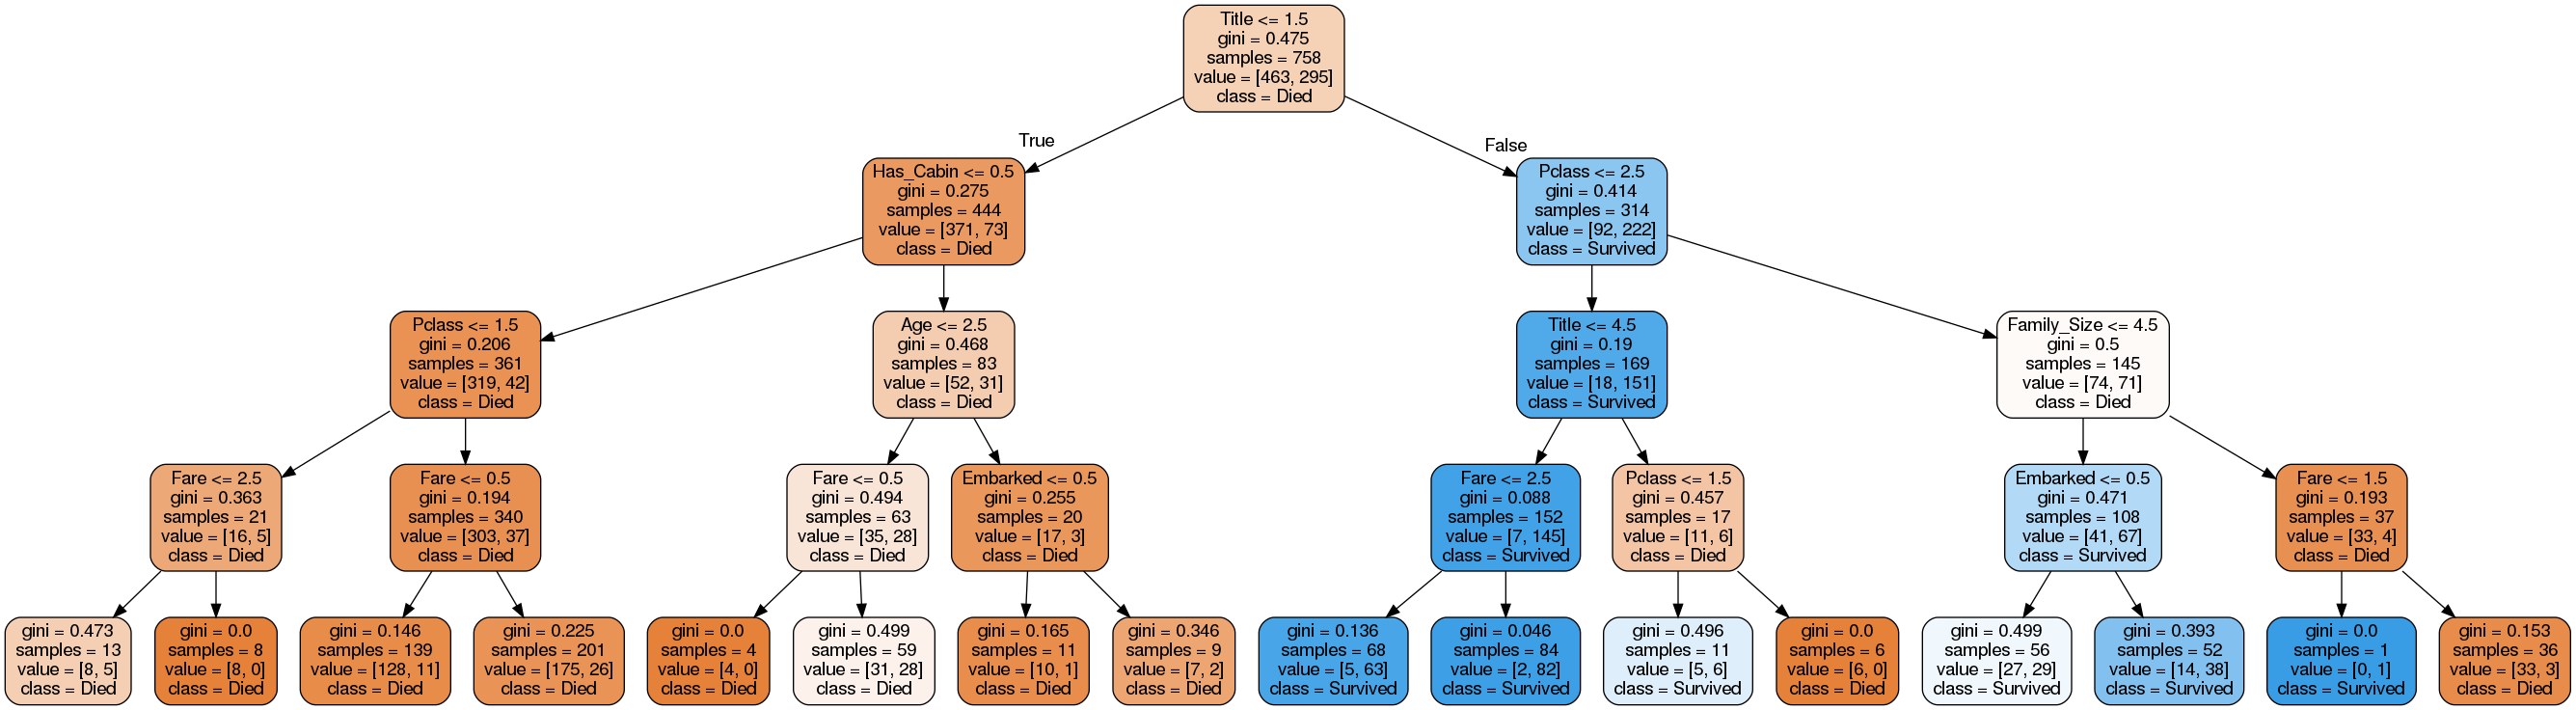

In [41]:
import pydotplus
from IPython.display import Image as PImage
from sklearn.externals.six import StringIO 

dot_data = StringIO()
tree.export_graphviz(decision_tree, out_file=dot_data, max_depth = 4, 
                     impurity = True, feature_names = list(train.drop(['Survived'], axis=1)), 
                     class_names = ['Died', 'Survived'], rounded = True, filled= True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
PImage(graph.create_png())

## Pros and Cons

**Pros**
*    Decision trees are easy to interpret and visualize.
*    It can easily capture Non-linear patterns.
*    It requires fewer data preprocessing from the user, for example, there is no need to normalize columns.
*    It can be used for feature engineering such as predicting missing values, suitable for variable selection.
*    The decision tree has no assumptions about distribution because of the non-parametric nature of the algorithm. 

**Cons**
*    Sensitive to noisy data. It can overfit noisy data.
*    The small variation(or variance) in data can result in the different decision tree. This can be reduced by bagging and boosting algorithms.
*    Decision trees are biased with imbalance dataset, so it is recommended that balance out the dataset before creating the decision tree.

## Conclusion

Decision Tree is a white box type of ML algorithm. It shares internal decision-making logic, which is not available in the black box type of algorithms such as Neural Network. Its training time is faster compared to the neural network algorithm. The time complexity of decision trees is a function of the number of records and number of attributes in the given data. The decision tree is a distribution-free or non-parametric method, which does not depend upon probability distribution assumptions. Decision trees can handle high dimensional data with good accuracy.